In [1]:
''' 
@@ Authur: Sanyukta Suman

Which kind of data set did you choose for your Project?

Answer- I have choosen the dataset which contains reviews from google playstore on snapchat.

There are four features in this data set. They are:
1. Date -Date the review is posted.
2. Rating- User rating out of 5.
3. Helpful- How many users think the review has been helpful.
4. Review- TextReview Description.


------ Objective of this project is to fid out wheather the review is positive or negative-------
'''



' \n@@ Authur: Sanyukta Suman\n\nWhich kind of data set did you choose for your Project?\n\nAnswer- I have choosen the dataset which contains reviews from google playstore on snapchat.\n\nThere are four features in this data set. They are:\n1. Date -Date the review is posted.\n2. Rating- User rating out of 5.\n3. Helpful- How many users think the review has been helpful.\n4. Review- TextReview Description.\n\n\n------ Objective of this project is to fid out wheather the review is positive or negative-------\n'

In [3]:
# Describe the RV-Fuction
'''The RV-function of the dataset is procedure of giving rating, measure of helpfullness and typing Review Text'''

#Define Data Value Space 
'''Data value set(DVS) ={Date, Rating, Helpful, Review Text}'''

'Data value set(DVS) ={Date, Rating, Helpful, Review Text}'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import numpy
import re
from sklearn.decomposition import PCA

In [5]:


data = pd.read_csv("Reviews.csv", sep = ",", nrows=100)


In [6]:
#Printing 100 samples from the data set
data.head()

,Date,Rating,Helpful,Review Text
0,19-Nov-19,4,0,Very Best camera and chat app🔥👍👍
1,19-Nov-19,5,0,I love love love this app🥰 its its amazingly e...
2,19-Nov-19,1,5,Broken joke of an app. Nothing else to it
3,19-Nov-19,5,0,One of the best texting a call apps out there
4,19-Nov-19,1,0,Have to download it again and again so that th...


In [7]:
#--------1. Data Preprocessing----------
rate_count=[]
rate_count=data['Rating'].value_counts()

In [28]:
rate_count

5    33
1    26
3    16
2    14
4    11
Name: Rating, dtype: int64

In [10]:
'''So if you see the ‘Rating’ column,it has 1,2,3,4,5 values. 
Our main objective is to predict whether a given review is positive or negative.
Here, if we consider 1,2 as negative reviews and 4,5 as positive reviews then logically 3 
does not add any value to our objective. So, let’s discard those rows where ‘Rating’=3'''

data=data[data['Rating']!=3]


In [11]:
'''Let’s convert the score values into class label either ‘positive’ or ‘negative’ .'''

def xyz(x):
    if x>3:
        return 'positive'
    else:
        return 'negative'
s=data['Rating']
d=list(map(xyz,s))
data['Rating']=d
data

,Date,Rating,Helpful,Review Text
0,19-Nov-19,positive,0,Very Best camera and chat app🔥👍👍
1,19-Nov-19,positive,0,I love love love this app🥰 its its amazingly e...
2,19-Nov-19,negative,5,Broken joke of an app. Nothing else to it
3,19-Nov-19,positive,0,One of the best texting a call apps out there
4,19-Nov-19,negative,0,Have to download it again and again so that th...
...,...,...,...,...
94,18-Nov-19,positive,0,Please remove camera sound its so annoying
95,18-Nov-19,positive,0,Soooooo awesome! Love the filters 😸
96,18-Nov-19,positive,0,amazing but when you send a vidio it takes lik...
97,18-Nov-19,positive,0,I can text people I need to text on this app m...


In [12]:
#removing duplicates and unwanted records.
data_f=data.sort_values('Date').drop_duplicates(subset=['Rating','Helpful','Review Text'],keep='first',inplace=False)

In [13]:
data_f.shape

(84, 4)

Text(0.5, 1.0, 'Rating')

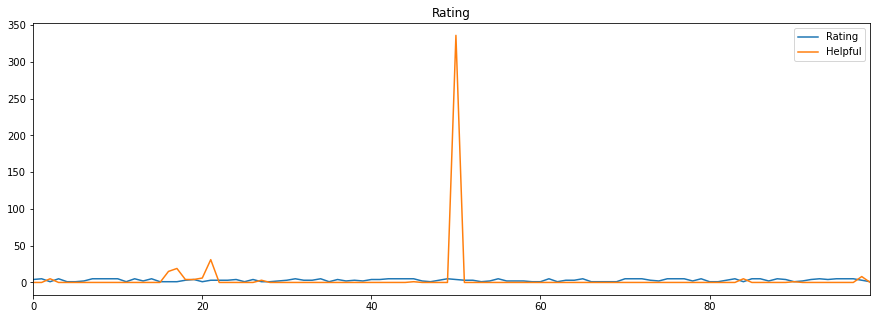

In [14]:

data = pd.read_csv("Reviews.csv", nrows=100)
#print(df)
data.plot(figsize=(15,5))
#plt.xlabel('Year')
#plt.ylabel('Pmf')
plt.title('Rating')
#plt.show()

In [15]:
#------Text Preprocessing steps------
'''a. Remove html tags.b. Remove any punctuations and special characters
c. Convert the word to lowercased. Remove stopwords
e. Finally I use snowballstemmer for stemming the words.'''


from bs4 import BeautifulSoup
stop=set(stopwords.words('english'))
snow = nltk.stem.SnowballStemmer('english')
#stop

def decontracted(phrase):
    phrase=re.sub(r"won't","will not",phrase)
    phrase=re.sub(r"can't","can not",phrase)
    phrase=re.sub(r"n\'t","not",phrase)
    phrase=re.sub(r"\'re","are",phrase)
    phrase=re.sub(r"\'s","is",phrase)
    phrase=re.sub(r"\'d","would",phrase)
    phrase=re.sub(r"\'ll","will",phrase)    
    phrase=re.sub(r"\'t","not",sentence)
    phrase=re.sub(r"\'ve","have",sentence)
    phrase=re.sub(r"\'m","am",sentence)
    return phrase
preprocessed_reviews=[]
for sentence in data_f['Review Text'].values:
    sentence=re.sub(r"http\S+"," ",sentence)
    sentence=BeautifulSoup(sentence,'lxml').get_text()
    cleanr=re.compile('<.*?>')
    sentence=re.sub(cleanr,' ',sentence)
    sentence=decontracted(sentence)
    sentence=re.sub("\S\*\d\S*"," ",sentence)
    sentence=re.sub("[^A-Za-z]+"," ",sentence)
    sentence=re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    sentence=re.sub(r'[.|,|)|(|\|/]',r' ',sentence)
    sentence='  '.join(snow.stem(e.lower()) for e in sentence.split() if e.lower() not in stop)
    preprocessed_reviews.append(sentence.strip())


In [16]:
len(preprocessed_reviews)

84

In [17]:
#-------Text Encoding-------
from gensim.models import Word2Vec
#df=data_f
list_of_sentences=[]
for sentence in preprocessed_reviews:
    list_of_sentences.append(sentence.split())
w2v_model=Word2Vec(list_of_sentences,min_count=5,size=50,workers=4)
w2v_words=list(w2v_model.wv.vocab)
sent_vectors=[]
for sent in list_of_sentences:
    sent_vec=np.zeros(50)
    cnt_words=0
    for word in sent:
        if word in w2v_words:
            vec=w2v_model.wv[word]
            sent_vec=sent_vec+vec
            cnt_words=cnt_words+1
    if cnt_words!=0:
        sent_vec=sent_vec/cnt_words
    sent_vectors.append(sent_vec)
    #sent_vectors.append(df)
print(len(sent_vectors))   
#print(sent_vectors[0])
#print(sent_vec)

84


In [18]:
review_df=pd.DataFrame(sent_vectors)

In [19]:
x = review_df.iloc[:,:-1].values
y = review_df.iloc[:,49].values

# Splitting the data into train-test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [20]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
# Principal Component Analysis
pca = PCA(n_components = 8) #found this to be the optimal number of columns 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

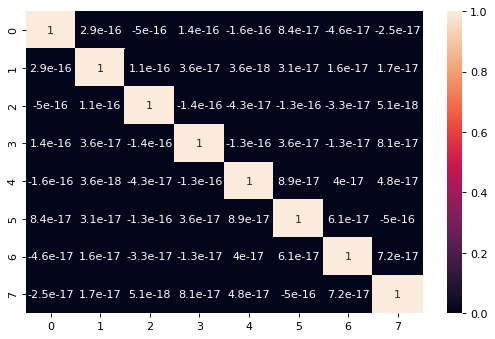

In [22]:
# after PCA we found 8 columns which can be selected 
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(pd.DataFrame(x_train).corr(), annot=True)

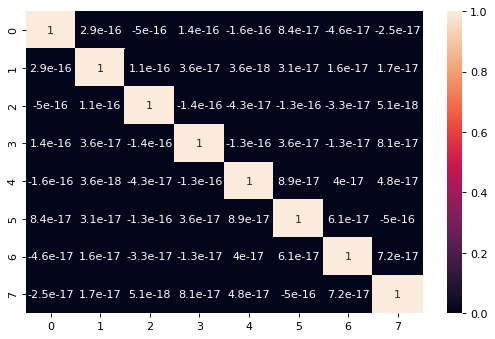

In [23]:
# To find the correlation among 
# the columns using pearson method 
# after PCA we found 8 columns which can be selected 
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(pd.DataFrame(x_train).corr(method='pearson'), annot=True)

In [46]:
#----Generating the correlation matrix-------
corr = review_df.corr()

In [49]:
#--------compare the correlation between features and remove one of two features that have a correlation higher than 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = review_df.columns[columns]
corr_df = review_df[selected_columns]

In [51]:
selected_columns = selected_columns[1:].values
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(corr_df.iloc[:,1:].values, corr_df.iloc[:,0].values, SL, selected_columns)

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

In [50]:
corr_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000123,-0.001864,-0.002518,-5.662042e-03,0.001453,0.000414,-0.000249,-0.000990,0.000953,-0.000762,...,0.002148,0.001733,0.000206,-0.000953,0.002450,-0.000767,0.000247,-0.000575,-0.000770,0.001210
1,-0.002683,-0.005676,0.002085,-5.769311e-07,-0.000455,-0.000302,-0.005606,0.002488,0.001597,-0.002439,...,0.000966,0.000231,0.004561,-0.004788,0.004931,0.002398,-0.002815,0.000049,-0.000349,-0.003257
2,-0.001416,-0.004249,0.001822,-1.842882e-03,0.000963,0.001068,-0.000009,-0.002442,0.004567,-0.003982,...,0.000863,0.002131,0.004867,-0.001949,0.004120,0.003348,-0.003129,-0.000875,0.001558,0.001718
3,-0.001969,-0.000387,-0.002711,-4.787745e-03,0.001342,0.004508,0.003539,-0.004662,0.000228,0.005513,...,-0.002439,0.000868,-0.006884,-0.003411,0.002957,-0.001454,-0.002728,0.002022,-0.001707,-0.001150
4,0.001560,-0.005053,-0.000586,-2.926543e-03,-0.003633,0.002192,0.002297,0.000548,0.001684,0.001064,...,-0.002346,0.005005,0.001671,-0.001675,0.003891,-0.002537,-0.000721,-0.000545,0.000741,-0.000408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,-0.001238,-0.001347,-0.006294,3.919095e-03,-0.000350,0.002212,-0.001579,0.003131,0.000637,0.004551,...,0.001179,0.000773,0.003995,-0.001790,-0.000459,-0.000943,0.000202,0.001596,-0.004625,0.003767
80,-0.000479,-0.000650,0.000147,-2.053050e-03,-0.000134,0.002587,-0.002323,-0.001722,-0.000161,-0.002968,...,-0.000474,0.001561,0.002448,-0.001232,0.001898,0.001792,-0.001180,0.000700,0.001686,0.003231
81,0.003238,-0.001034,0.001880,4.404472e-03,-0.000887,-0.006045,0.000815,-0.003537,-0.000141,-0.001707,...,-0.004133,0.000697,-0.001540,-0.007095,0.003014,0.001128,-0.001797,0.003248,0.007330,0.005405
82,-0.000250,-0.006789,-0.002213,-1.499712e-03,-0.000405,0.000636,-0.001041,0.002672,0.006714,-0.002845,...,0.001072,0.000788,0.008695,-0.000500,0.003657,0.001050,0.001338,0.001052,0.002242,-0.001332


In [30]:
summary = data_f.describe()
summary = summary.transpose()
#Calculate the mean value, the standard deviation
summary.head()

,count,mean,std,min,25%,50%,75%,max
Helpful,84.0,4.702381,36.691084,0.0,0.0,0.0,0.0,336.0


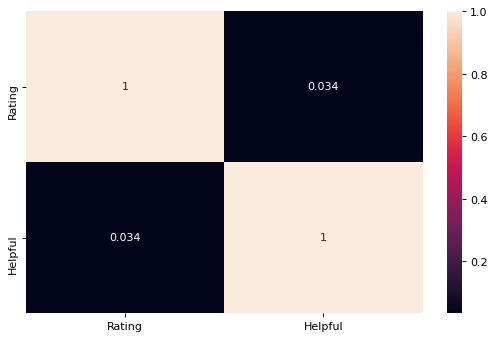

In [24]:
#---------correlation of original data-------
figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(pd.DataFrame(data).corr(method='pearson'), annot=True)

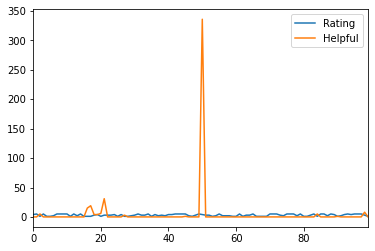

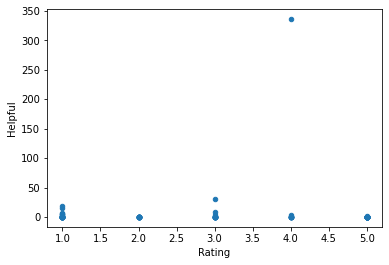

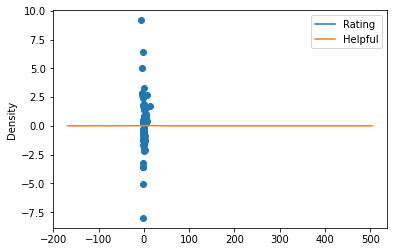

In [43]:
#-------scatter plots---------------

# plot scatter plot : rating vs all features
data.plot()  # plots all columns against index
data.plot(kind='scatter',x='Rating',y='Helpful') # scatter plot
data.plot(kind='density')  # estimate density function


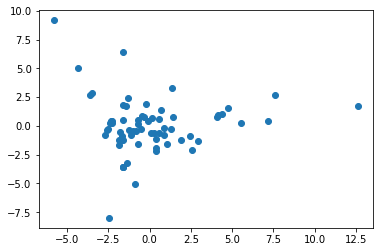

In [44]:
#------Scatter plot for encoded text 
plt.scatter(x_train[:,0], x_train[:,1])